In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [3]:
pip install datatable 

## [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

- ## Plot the number of posts for each profile in descending order.

\- We take only the two coloumns (profile_name, n_posts) of interest to us from our DataFrame 'instagram_profiles.csv'

In [2]:
prof_data = dt.fread('instagram_profiles.csv', sep='\t', columns={"profile_name", "firstname_lastname", "n_posts", "is_business_account"}).to_pandas()

In [3]:
prof_data

,profile_name,firstname_lastname,n_posts,is_business_account
0,jphillip033,John Pierce,170.0,False
1,mama_haas,Deanna,2878.0,False
2,yellowlightbreen,Eliza Gray,431.0,False
3,tec1025,Thomas Clark,NaN,NaN
4,luckyfluff,,NaN,NaN
...,...,...,...,...
4509581,karenarkesteyn,Karen Arkesteyn,497.0,False
4509582,jornvlaeminck,Jorn Vlaeminck,NaN,NaN
4509583,s_degol,Sanne Degol,NaN,NaN
4509584,anwilms,An Wilms,183.0,False


\- As we could see in RQ1, in the DataFrame there are many NaN values so now we remove the row of "mydata" where such 'non-values' are present

Now we want to sort this coloumn in descending order

In [4]:
prof_posts = prof_data[['profile_name', 'n_posts']].dropna().sort_values("n_posts", ascending=False)

In [5]:
prof_posts

,profile_name,n_posts
3990313,jasem33312,183730.0
2571453,koenigpic,142428.0
4338921,rudyanto62,126340.0
3942129,hometown_ni,125220.0
4219642,dwfitfiber_thailand,117262.0
...,...,...
2402230,faith.dever,0.0
2402229,sugarsprinkledglitter,0.0
377966,hannahkraft13,0.0
2402225,4pf_cj_,0.0


In [6]:
prof_posts['n_posts'] = prof_posts['n_posts'].astype(int)

In [7]:
prof_posts

,profile_name,n_posts
3990313,jasem33312,183730
2571453,koenigpic,142428
4338921,rudyanto62,126340
3942129,hometown_ni,125220
4219642,dwfitfiber_thailand,117262
...,...,...
2402230,faith.dever,0
2402229,sugarsprinkledglitter,0
377966,hannahkraft13,0
2402225,4pf_cj_,0


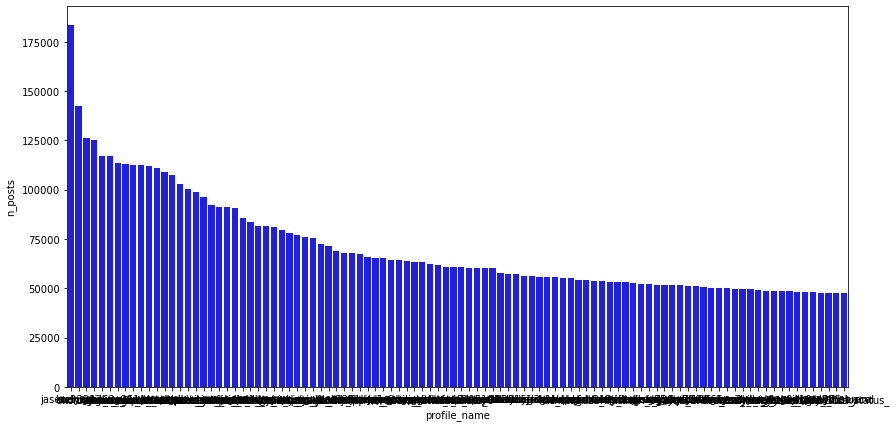

In [29]:
plt.figure(figsize=(14,7))
sns.barplot(data = prof_posts[:100],
            x="profile_name",
            y="n_posts",
            color='blue');

\- As a final step, let's graph the top 20 profiles with the most posts

<BarContainer object of 25 artists>

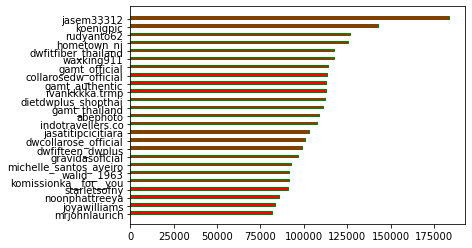

In [9]:
plt.barh(prof_posts.profile_name.head(25)[::-1], prof_posts.n_posts.head(25)[::-1], height=0.3, align='edge', color='red', edgecolor='green')

- ## What posts have the highest number of "likes"?

\- We take only the two coloumns (post_id, numbr_likes) of interest to us from our DataFrame 'instagram_posts.csv'

In [10]:
post_data = dt.fread('instagram_posts.csv', sep='\t', columns={"post_id", "numbr_likes", "number_comments", "location_id", "post_type"}).to_pandas()

In [11]:
post_likes= post_data[['post_id', 'numbr_likes']]
post_likes

,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0
...,...,...
42710192,BcpWMWGBfxh,74.0
42710193,Ba6LZWwlCl8,49.0
42710194,BPN0kM1hYUw,18.0
42710195,BxsZ8nDBr-L,27.0


In [28]:
post_likes = post_likes.dropna().sort_values("numbr_likes", ascending=False)
post_likes['numbr_likes'] = post_likes['numbr_likes'].astype(int)
post_likes.head(25)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952
19623988,BuwffB7g8cK,5447066
19624082,Buc1gyZAaMQ,5116398
19623986,BvcukE8AMuG,4271466
39701024,BqSLFVBFLfq,4264745
6293907,BwTSXBKg7gN,3586546
19624086,Btw8pFXAvQm,3558599
19802016,BvC3n6_gqin,3533326
30850564,Bw7vqLrFkHi,3340297
39812576,Bw2gTH1AiDA,3311246


#### aggiungere plot

- ## What posts have the most and the least number of comments?

In [29]:
post_comms = post_data[['post_id','number_comments']].dropna()

In [30]:
post_comms['number_comments'] = post_comms['number_comments'].astype(int)
post_comms

,post_id,number_comments
0,BXdjjUlgcgq,0
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,0
3,BKTKeNhjEA7,0
4,8-NQrvoYLX,0
...,...,...
42710192,BcpWMWGBfxh,0
42710193,Ba6LZWwlCl8,0
42710194,BPN0kM1hYUw,0
42710195,BxsZ8nDBr-L,1


In [34]:
most_comms = post_comms.sort_values("number_comments", ascending=False).head(1)

In [35]:
most_comms

,post_id,number_comments
41873060,Bx2sPAjHviO,488953


In [36]:
least_comms = post_comms.sort_values("number_comments", ascending=False).tail(1)

In [37]:
least_comms

,post_id,number_comments
0,BXdjjUlgcgq,0


In [38]:
print(f" Post: {most_comms.iloc[0, :].post_id} has the most number of comments: {most_comms.iloc[0, :].number_comments}")
print(f" Post: {least_comms.iloc[0, :].post_id} has the least number of comments: {least_comms.iloc[0, :].number_comments}")

 Post: Bx2sPAjHviO has the most number of comments: 488953
 Post: BXdjjUlgcgq has the least number of comments: 0


#### Possono esserci però più posts che hanno il maggiore e il minore numero di commenti, come faccio a prenderli tutti?

#### Da fare poi un grafico

- ## How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [41]:
loc_data = post_data[['post_id', 'location_id']]
loc_data

,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14
...,...,...
42710192,BcpWMWGBfxh,4.574268e+14
42710193,Ba6LZWwlCl8,4.574268e+14
42710194,BPN0kM1hYUw,4.574268e+14
42710195,BxsZ8nDBr-L,4.267235e+06


In [42]:
unlocated = loc_data.location_id.isna().sum()
located = loc_data.location_id.notna().sum()
results = {'location':[True,False], 'n_posts' : [located, unlocated]}
post_loc = pd.DataFrame(results)
post_loc

,location,n_posts
0,True,29737425
1,False,12972772


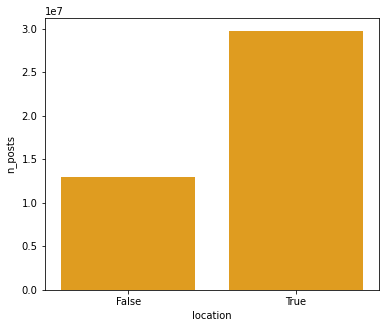

In [49]:
plt.figure(figsize=(6, 5))
sns.barplot(
    y="n_posts", 
    x="location", 
    data=post_loc, 
    estimator=sum, 
    ci=None, 
    color='orange');

- ## How many posts include only photos? How many also have videos?

In [51]:
types = post_data[['post_id', 'post_type']]
types

,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1
...,...,...
42710192,BcpWMWGBfxh,1
42710193,Ba6LZWwlCl8,1
42710194,BPN0kM1hYUw,1
42710195,BxsZ8nDBr-L,1


In [52]:
print(f" Number of posts have only photos: {(types['post_type'] == 1.0).sum()}")
print(f" Number of posts have also videos: {(types['post_type'] > 1.0).sum()}")

 Number of posts have only photos: 41534486
 Number of posts have also videos: 1175711


<AxesSubplot:>

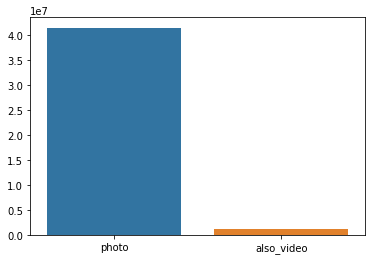

In [53]:
sns.barplot(x=['photo', 'also_video'],y=[(types['post_type'] == 1.0).sum(),(types['post_type'] > 1.0).sum()])

([<matplotlib.patches.Wedge at 0x2a553b3aa90>,
 [Text(-1.0958891532929231, 0.09501033467428857, 'photo'),
  Text(1.095889138281737, -0.09501050781946144, 'also_video')])

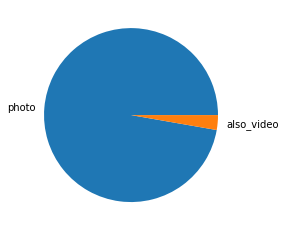

In [54]:
plt.pie([(types['post_type'] == 1.0).sum(),(types['post_type'] > 1.0).sum()], labels = ['photo', 'also_video'])

- ## What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage? 

In [58]:
buss_data = prof_data[['profile_name', 'is_business_account']]

In [59]:
buss_data

,profile_name,is_business_account
0,jphillip033,False
1,mama_haas,False
2,yellowlightbreen,False
3,tec1025,NaN
4,luckyfluff,NaN
...,...,...
4509581,karenarkesteyn,False
4509582,jornvlaeminck,NaN
4509583,s_degol,NaN
4509584,anwilms,False


In [61]:
buss_data.fillna(False)
perc_is_business = buss_data.is_business_account.value_counts(normalize=True)*100
perc_is_business


False    81.034756
True     18.965244
Name: is_business_account, dtype: float64

In [85]:
#percentages = is_business / df5.shape[0] * 100
#percentages

False    81.034756
True     18.965244
Name: is_business_account, dtype: float64

([<matplotlib.patches.Wedge at 0x2a554407100>,
 [Text(-0.9104633068776324, 0.6172977942852592, 'False'),
  Text(0.9104634224687973, -0.6172976237977953, 'True')])

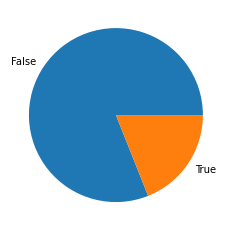

In [62]:
plt.pie(perc_is_business, labels=['False', 'True'])